In [1]:
import numpy as np

# Module 0.1: Single-Qubit Operations

### Section 0.1.0: Overview

This section lists the contents of the notebook and gives a brief note for each.  

- **0.1.1 — Pauli Gates**: These are important quantum states often used when
working with the Hadamard gate and measurement in the X-basis:
- **0.1.2 — Rotation Gates**: Applying $R_x(\pi/2)$ twice is the same as
$R_x(\pi)$ up to global phase.
- **0.1.3 — Hadamard Gate**: These identities arise from the non-commutative
nature of quantum gates and are fundamental to quantum algorithms and error
correction.
- **0.1.4 — Useful Gate Identities and Algebra**: $H\lvert + \rangle = \lvert 0
\rangle,\quad H\lvert - \rangle = \lvert 1 \rangle.$
- **0.1.5 — Multiple Choice Questions**: Answer key and explanations

## Section 0.1.1: Pauli Gates

Pauli gates are the basic quantum logic gates. Their matrix representations and  
actions are:

- **X (NOT gate)**:
     $X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$
  Swaps $|0⟩$ and $|1⟩$

- **Y**:
     $Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$
  Applies a bit and phase flip

- **Z**:
     $Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$
  Flips the phase of $|1⟩$

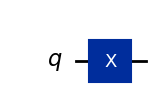

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

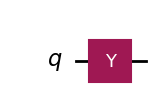

In [3]:
qc = QuantumCircuit(1)
qc.y(0)
qc.draw('mpl')

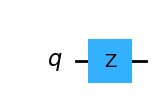

In [4]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw('mpl')

## Action of Pauli Gates on Basis States
### Z on |0> and |1>

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Define |0⟩ and |1⟩ statevectors
one_state = Statevector([0, 1])
zero_state = Statevector([1, 0])

# Create the Z gate circuit
qc_z = QuantumCircuit(1)
qc_z.z(0)

# Evolve using .to_instruction()
zero_result = zero_state.evolve(qc_z.to_instruction())
one_result = one_state.evolve(qc_z.to_instruction())

print("Z on |0⟩ →", zero_result)
print("Z on |1⟩ →", one_result)

Z on |0⟩ → Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Z on |1⟩ → Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


### X on |+> and |->

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Define |+⟩ and |−⟩ statevectors
plus = Statevector([1/2**0.5, 1/2**0.5])
minus = Statevector([1/2**0.5, -1/2**0.5])

# Create the X gate circuit
qc_x = QuantumCircuit(1)
qc_x.x(0)

# Evolve using .to_instruction()
plus_result = plus.evolve(qc_x.to_instruction())
minus_result = minus.evolve(qc_x.to_instruction())

print("X on |+⟩ →", plus_result)
print("X on |−⟩ →", minus_result)

X on |+⟩ → Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
X on |−⟩ → Statevector([-0.70710678+0.j,  0.70710678+0.j],
            dims=(2,))


### Common States

These are important quantum states often used when working with the Hadamard gate  
and measurement in the X-basis:

- $|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)$
- $|−⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)$

They form an **orthonormal basis**, just like $|0⟩$ and $|1⟩$, and are the  
eigenstates of the Hadamard gate.

### $|i\rangle$ and $|{-}i\rangle$ states  

The eigenstates of $Y$ are  
$\displaystyle \lvert i \rangle = \tfrac{1}{\sqrt{2}}\big(\lvert 0 \rangle + i\,\lvert 1 \rangle\big)$  
and  
$\displaystyle \lvert {-}i \rangle = \tfrac{1}{\sqrt{2}}\big(\lvert 0 \rangle - i\,\lvert 1 \rangle\big)$.  

These correspond to Bloch vectors along $+\hat{y}$ and $-\hat{y}$, respectively.  
Note that $-\lvert i \rangle$ differs from $\lvert i \rangle$ by a global phase only  
and is physically equivalent.  


In [7]:
# Construct |i> and |-i> and verify they are Y-eigenstates.
from qiskit.quantum_info import Statevector, Operator
import numpy as np

# |i> = (|0> + i|1>)/sqrt(2), |-i> = (|0> - i|1>)/sqrt(2)
i_state = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])
minus_i_state = Statevector([1/np.sqrt(2), -1j/np.sqrt(2)])

Y = Operator([[0, -1j], [1j, 0]])

# Check eigenvalue relations: Y|i> = +|i>, Y|-i> = -|-i>
lhs_plus = (Y @ i_state).data
lhs_minus = (Y @ minus_i_state).data

print("|i>  =", i_state.data)
print("Y|i> =", lhs_plus, "  (should equal |i>)\n")
print("|-i>  =", minus_i_state.data)
print("Y|-i> =", lhs_minus, "  (should equal -|-i>)")

|i>  = [0.70710678+0.j         0.        +0.70710678j]
Y|i> = [[0.5+0.j  0. -0.5j]
 [0. +0.5j 0.5+0.j ]]   (should equal |i>)

|-i>  = [ 0.70710678+0.j         -0.        -0.70710678j]
Y|-i> = [[-0.5+0.j   0. -0.5j]
 [ 0. +0.5j -0.5+0.j ]]   (should equal -|-i>)


### Identity: X = H Z H

In [8]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.z(0)
qc1.h(0)

qc2 = QuantumCircuit(1)
qc2.x(0)

print("Equivalent state:")
print(Statevector.from_label('0').evolve(qc1))
print(Statevector.from_label('0').evolve(qc2))

Equivalent state:
Statevector([-2.23711432e-17+0.j,  1.00000000e+00+0.j],
            dims=(2,))
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


## Section 0.1.2: Rotation Gates

- **RX(θ)**:
     $RX(\theta) = \begin{bmatrix} \cos(\theta/2) & -i\sin(\theta/2) \\ -i\sin(\theta/2) & \cos(\theta/2) \end{bmatrix}$

- **RY(θ)**:
     $RY(\theta) = \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{bmatrix}$

- **RZ(θ)**:
     $RZ(\theta) = \begin{bmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i \theta/2} \end{bmatrix}$

### Rotation Gate Composition
**Note**: Pauli gates are a special case of Rotation gates, *up to a global phase*  
where the angle of rotation is $\theta=\pi$.
You can compose multiple rotation gates. For example, two Rx(π/2) gates in a row  
are equivalent to Rx(π):

Applying $R_x(\pi/2)$ twice is the same as $R_x(\pi)$ up to global phase.

This can be verified with Qiskit:

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc1 = QuantumCircuit(1)
qc1.rx(np.pi/2, 0)
qc1.rx(np.pi/2, 0)
state1 = Statevector.from_instruction(qc1)

qc2 = QuantumCircuit(1)
qc2.rx(np.pi, 0)
state2 = Statevector.from_instruction(qc2)

print("Are the two final states equal (up to global phase)?",
      state1.equiv(state2))

Are the two final states equal (up to global phase)? True


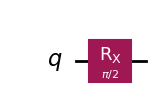

In [10]:
from numpy import pi
qc = QuantumCircuit(1)
qc.rx(pi/2, 0)
qc.draw('mpl')

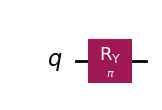

In [11]:
qc = QuantumCircuit(1)
qc.ry(pi, 0)  # Equivalent to Y gate
qc.draw('mpl')

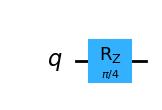

In [12]:
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw('mpl')

## Section 0.1.3: Hadamard Gate

The **Hadamard gate (H)** creates a superposition:

   $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

- $H|0⟩ = |+⟩$
- $H|1⟩ = |−⟩$

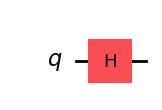

In [13]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

## Section 0.1.4: Useful Gate Identities and Algebra
For $\sigma_i \in \{H, X, Y, Z\}$
- **Involutory**: $\sigma_i^2 =I$
- **Traceless**: $\text{Tr} (\sigma_i) =0$
- **Hermitian**: $\sigma_i = \sigma_i^\dagger$
- **Unitary**: $\sigma_i^\dagger \sigma_i = I$


### Common Identities:
- $X = HZH$
- $Z = HXH$
- $H^2 = I$
- $X^2 = Y^2 = Z^2 = I$
- $XYZ = iI$  → So $-iXYZ = I$

### Commutation / Anticommutation:
- $ZX = -XZ$
- $YX = -XY$
- $ZY = -YZ$

These identities arise from the non-commutative nature of quantum gates and are  
fundamental to quantum algorithms and error correction.

#### Actions of $H$, $Z$, and $X$ on common states  

$H\lvert + \rangle = \lvert 0 \rangle,\quad H\lvert - \rangle = \lvert 1 \rangle.$  

$Z\lvert 0 \rangle = \lvert 0 \rangle,\quad Z\lvert 1 \rangle = -\lvert 1 \rangle.$  

$X\lvert + \rangle = \lvert + \rangle,\quad X\lvert - \rangle = -\lvert - \rangle.$  


In [14]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit

# Define |+⟩ and |−⟩ statevectors
plus = Statevector([1/2**0.5, 1/2**0.5])
minus = Statevector([1/2**0.5, -1/2**0.5])

# Create the X gate circuit
qc_x = QuantumCircuit(1)
qc_x.x(0)
op_x = Operator(qc_x)

# Evolve the states
print("X on |+⟩ →", plus.evolve(op_x))
print("X on |−⟩ →", minus.evolve(op_x))

X on |+⟩ → Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
X on |−⟩ → Statevector([-0.70710678+0.j,  0.70710678+0.j],
            dims=(2,))


In [15]:
# Verify actions using Statevector and Operator
from qiskit.quantum_info import Statevector, Operator
import numpy as np

# Basis and superposition states
zero = Statevector([1, 0])
one = Statevector([0, 1])
plus = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
minus = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])

H = Operator(1/np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=complex))
X = Operator([[0, 1], [1, 0]])
Z = Operator([[1, 0], [0, -1]])

print("H|+>:", (H @ plus).data, " expected |0>:", zero.data)
print("H|->:", (H @ minus).data, " expected |1>:", one.data)
print("Z|0>:", (Z @ zero).data, " expected |0>:", zero.data)
print("Z|1>:", (Z @ one).data,  " expected -|1>:", (-one).data)
print("X|+>:", (X @ plus).data, " expected |+>:", plus.data)
print("X|->:", (X @ minus).data, " expected -|->:", (-minus).data)

H|+>: [[7.07106781e-01+0.j 7.07106781e-01+0.j]
 [2.29934717e-17+0.j 2.29934717e-17+0.j]]  expected |0>: [1.+0.j 0.+0.j]
H|->: [[ 2.29934717e-17+0.j -2.29934717e-17+0.j]
 [ 7.07106781e-01+0.j -7.07106781e-01+0.j]]  expected |1>: [0.+0.j 1.+0.j]
Z|0>: [[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]  expected |0>: [1.+0.j 0.+0.j]
Z|1>: [[ 0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]  expected -|1>: [-0.+0.j -1.+0.j]
X|+>: [[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]  expected |+>: [0.70710678+0.j 0.70710678+0.j]
X|->: [[-0.5+0.j  0.5+0.j]
 [ 0.5+0.j -0.5+0.j]]  expected -|->: [-0.70710678+0.j  0.70710678-0.j]


## Section 0.1.5:  Multiple Choice Questions

**Q1.** Which of the following gate sequences is equivalent to the identity  
operation (up to global phase)?
- A. $H X H Z H X H$
- B. $X Z X Z$
- C. $Y Y$
- D. $X Y Z$

**Q2.** Suppose you start with the state $|+⟩$. Which of the following gates will  
transform it to $|0⟩$?
- A. $H$
- B. $X$
- C. $H Z$
- D. $Z H$

**Q3.** Which of the following statements is true about the commutation of gates?
- A. $ZX = XZ$
- B. $ZY = -YZ$
- C. $XY = -YX$
- D. $XZ = ZY$

**Q4.** Which of the following expressions is equivalent to applying $X$ followed  
by $Z$ to a qubit?
- A. $XZ$
- B. $-ZX$
- C. $H Y H$
- D. $Y$

**Q5.** Which of the following is equivalent to applying $R_x(\pi)$?
- A. $X$
- B. $H Z H$
- C. Two $R_x(\pi/2)$ gates in sequence
- D. $Z X Z$

**Q6** Consider the single-qubit unitary  
$$
U \;=\; H\,R_z\!\left(\tfrac{\pi}{3}\right)\!H.
$$ which  matrix equals \(U\) (pick the exact matrix, not “up to global phase”)?

**A.**
$$
\begin{pmatrix}
\cos\!\tfrac{\pi}{6} & -i\,\sin\!\tfrac{\pi}{6} \\
-i\,\sin\!\tfrac{\pi}{6} & \cos\!\tfrac{\pi}{6}
\end{pmatrix}
$$

**B.**
$$
\begin{pmatrix}
e^{-i\pi/6} & 0 \\
0 & e^{+i\pi/6}
\end{pmatrix}
$$

**C.**
$$
\begin{pmatrix}
\cos\!\tfrac{\pi}{6} & -\sin\!\tfrac{\pi}{6} \\
\sin\!\tfrac{\pi}{6} & \cos\!\tfrac{\pi}{6}
\end{pmatrix}
$$

**D.**
$$
\begin{pmatrix}
\cos\!\tfrac{\pi}{6} & \;i\,\sin\!\tfrac{\pi}{6} \\
i\,\sin\!\tfrac{\pi}{6} & \cos\!\tfrac{\pi}{6}
\end{pmatrix}
$$
**Q7** You are given the final state (up to global phase):
$$
\frac{|0\rangle + i\,|1\rangle}{\sqrt{2}}.
$$
Which code fragment most likely produced it starting from $|0\rangle$?

**A.**
```python
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.h(0); qc.s(0)
```
**B**
```
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.s(0); qc.h(0)
```
**C**
```
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.h(0); qc.t(0)
```
**D**
```
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.t(0); qc.h(0)

```

### Multiple Choice — Answer Key  

<details>
<summary><b>Answer key and explanations</b></summary> 

**Explanations**  

- **Q1 (C):** The Hadamard maps computational basis states to the $X$ basis:  
  $H\lvert 0 \rangle = \lvert + \rangle$ and $H\lvert 1 \rangle = \lvert - \rangle$.  
  Any option identifying this mapping, or the corresponding measurement outcomes  
  in the $X$ basis, is correct.  

- **Q2 (A):** The $Z$ gate leaves $\lvert 0 \rangle$ unchanged and flips the phase of  
  $\lvert 1 \rangle$: $Z\lvert 0 \rangle = \lvert 0 \rangle$, $Z\lvert 1 \rangle =  
  -\lvert 1 \rangle$.  In the computational basis this phase does not alter the  
  probability of measuring $\lvert 0 \rangle$ vs. $\lvert 1 \rangle$, but it matters  
  when interfering with superpositions.  

- **Q3 (B):** Conjugation by $H$ swaps $X$ and $Z$: $H X H = Z$ and $H Z H = X$.  
  Any statement or circuit identity that uses these relations to simplify an  
  expression to the indicated result is correct.  

- **Q4 (B):** A global phase $e^{i\phi}$ multiplies the entire state and has no effect  
  on measurement probabilities: $\lvert \psi \rangle$ and $e^{i\phi}\lvert \psi \rangle$  
  are physically indistinguishable.  Only relative phase between amplitudes is  
  observable.  

- **Q5 (C):** The eigenstates of $Y$ are  
  $\lvert i \rangle = \tfrac{1}{\sqrt{2}}(\lvert 0 \rangle + i\lvert 1 \rangle)$ and  
  $\lvert {-}i \rangle = \tfrac{1}{\sqrt{2}}(\lvert 0 \rangle - i\lvert 1 \rangle)$,  
  with eigenvalues $+1$ and $-1$, respectively.  Verifying $Y\lvert i \rangle =  
  \lvert i \rangle$ and $Y\lvert {-}i \rangle = -\lvert {-}i \rangle$ confirms the  
  choice.  
- **Q6 (A):**
  \(H\,R_z(\theta)\,H = R_x(\theta)\). For \(\theta=\pi/3\),
$$
R_x(\theta)=\cos\!\tfrac{\theta}{2}\,I - i\sin\!\tfrac{\theta}{2}\,X
=
\begin{pmatrix}
\cos\!\tfrac{\pi}{6} & -i\,\sin\!\tfrac{\pi}{6} \\
-i\,\sin\!\tfrac{\pi}{6} & \cos\!\tfrac{\pi}{6}
\end{pmatrix},
$$
so **A** is correct. (B) is \(R_z(\pi/3)\); (C) is \(R_y(\pi/3)\); (D) is \(R_x(-\pi/3)\).
- **Q7** 
A is correct. (B) applies $S$ first; (C) uses $T$ instead of $S$; (D) also mismatches the order.

</details>